# Importing the corpus


In [1]:
import pickle

In [2]:
# corpus_fr=[]
# corpus_en=[]
# puncList = [".",";",":","!","?","/","\\",",","#","@","$","&",")","(","\"","..."]
# i=0
# with open ("train_fr.fr", "r",encoding="utf8") as myfile:
#     for line in myfile:
#         sentence=[]
#         for word in line.split(" "):
#             word=word.replace("\n","")
#             if(word not in puncList):
#                 if word.replace('.','',1).isdigit():
#                     word="DIG"
#                 sentence.append(word) 
#         corpus_fr.append(sentence)
      

       
# with open ("train_en.en", "r",encoding="utf8") as myfile:
#     for line in myfile:
#         sentence=[]
#         for word in line.split(" "):
#             word=word.replace("\n","")
#             if(word not in puncList):
#                 if word.replace('.','',1).isdigit():
#                     word="DIG"
#                 sentence.append(word) 
#         corpus_en.append(sentence)

# with open('corpus_en.pkl', 'wb') as f:
#     pickle.dump(corpus_en, f)
# with open('corpus_fr.pkl', 'wb') as f:
#     pickle.dump(corpus_fr, f)
    
corpus_en = pickle.load(open("corpus_en.pkl", "rb"))
corpus_fr = pickle.load(open("corpus_fr.pkl", "rb"))

In [3]:
len(corpus_en) == len(corpus_fr)

True

# Building the dictionary for word2Vec

In [4]:
from gensim.models import word2vec

In [5]:
# model_en=word2vec.Word2Vec(corpus_en,min_count=1)
# model_fr=word2vec.Word2Vec(corpus_fr,min_count=1)

# with open('model_en.pkl', 'wb') as f:
#     pickle.dump(model_en, f)
# with open('model_fr.pkl', 'wb') as f:
#     pickle.dump(model_fr, f)
    
model_en = pickle.load(open("model_en.pkl", "rb"))
model_fr = pickle.load(open("model_fr.pkl", "rb"))

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [7]:
X_fr = model_fr[model_fr.wv.vocab]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [8]:
X_en = model_en[model_en.wv.vocab]

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


# PCA and Visualization

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result_fr_pca = pca.fit_transform(X_fr)

In [10]:
pca = PCA(n_components=2)
result_en_pca = pca.fit_transform(X_en)

un
deux
trois
quatre
cinq
six
sept


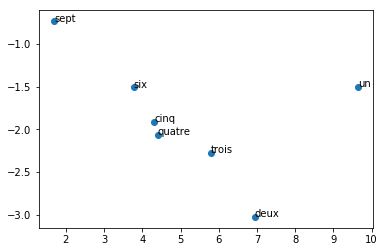

In [11]:
import numpy as np
import matplotlib.pyplot as plt
#FRENCH
# create a scatter plot of the projection
index_fr=[list(model_fr.wv.vocab).index("un"),list(model_fr.wv.vocab).index("deux"),list(model_fr.wv.vocab).index("trois"),list(model_fr.wv.vocab).index("quatre"),list(model_fr.wv.vocab).index("cinq"),list(model_fr.wv.vocab).index("six"),list(model_fr.wv.vocab).index("sept")]
result_fr=np.array([result_fr_pca[i] for i in index_fr])
plt.scatter(-result_fr[:, 0],-result_fr[:, 1])
fr_words = [ list(model_fr.wv.vocab)[i] for i in index_fr]
for i, word in enumerate(fr_words):
    print(word)
    plt.annotate(word, xy=(-result_fr[i, 0], -result_fr[i, 1]))
plt.show()

one
two
three
four
five
six
seven


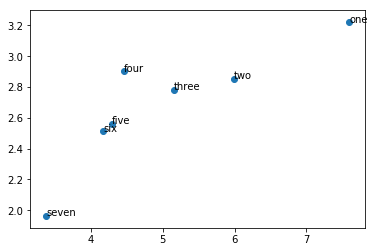

In [12]:
#ENGLISH
# create a scatter plot of the projection
index_en=[list(model_en.wv.vocab).index("one"),list(model_en.wv.vocab).index("two"),list(model_en.wv.vocab).index("three"),list(model_en.wv.vocab).index("four"),list(model_en.wv.vocab).index("five"),list(model_en.wv.vocab).index("six"),list(model_en.wv.vocab).index("seven")]
result_en=np.array([result_en_pca[i] for i in index_en])
plt.scatter(result_en[:, 0], result_en[:, 1])
en_words = [ list(model_en.wv.vocab)[i] for i in index_en]
for i, word in enumerate(en_words):
    print(word)
    plt.annotate(word, xy=(result_en[i, 0], result_en[i, 1]))
plt.show()

# Reducing Objective Function

In [13]:
all_word = []
english_vocab = set()
for sentence in corpus_en:
    for word in sentence:
        all_word.append(word)
        english_vocab.add(word)
        
french_vocab = set()
for sentence in corpus_fr:
    for word in sentence:
        french_vocab.add(word)

In [14]:
len(english_vocab)

340762

In [15]:
len(french_vocab)

409976

In [16]:
from collections import Counter
counts = Counter(all_word)
common_vocab = set()
train_vocab = set()
for word in counts.most_common(70000):
    common_vocab.add(word[0])
for word in counts.most_common(10000):
    train_vocab.add(word[0])

In [17]:
from googletrans import Translator  # Import Translator module from googletrans package
translator = Translator() # Create object of Translator.

In [18]:
translated = translator.translate('one',src="en",dest="fr")
translated.text

'un'

# Create Pairs of English-French Tuples

In [19]:
# import pickle

# word_pairs = []
# word_pairs_smaller = []

# count = 0
# for word in english_vocab:
#     print(count)
#     count += 1
#     translator = Translator()
#     french_word = translator.translate(word,src="en",dest="fr").text
#     if french_word in french_vocab:
#         word_pairs.append((word, french_word))
#         if french_word != word:
#             word_pairs_smaller.append((word, french_word))

# with open('word_pairs.pkl', 'wb') as f:
#     pickle.dump(word_pairs, f)
# with open('word_pairs_smaller.pkl', 'wb') as f:
#     pickle.dump(word_pairs_smaller, f)

In [20]:
word_pairs = pickle.load(open("word_pairs.pkl", "rb"))

In [21]:
word_pairs

[('Moktar', 'Moktar'),
 ('Respekt', 'Respekt'),
 ('trapped', 'piégé'),
 ('upturn', 'amélioration'),
 ('Cormak', 'Cormak'),
 ('Trafficked', 'Trafficking'),
 ('South-east', 'Sud-est'),
 ('Abdur', 'Abdur'),
 ('Hayes', 'Hayes'),
 ('webmasters', 'webmasters'),
 ('Nasimi', 'Nasimi'),
 ('Ahsan', 'Ahsan'),
 ('Rejected', 'Rejeté'),
 ('jaunty', 'désinvolte'),
 ('Sonde', 'Sonde'),
 ('Edmondson', 'Edmondson'),
 ('réunion', 'réunion'),
 ('kettles', 'bouilloires'),
 ('Alright', 'Bien'),
 ('chisels', 'ciseaux'),
 ('moist', 'humide'),
 ('materialized', 'matérialisé'),
 ('Beaudry', 'Beaudry'),
 ('Toute', 'Toute'),
 ('Yehudit', 'Yehudit'),
 ('hercampuri', 'hercampuri'),
 ('Dalcourt', 'Dalcourt'),
 ('Chelomei', 'Chelomei'),
 ('Pugliese', 'Pugliese'),
 ('www.nhs.uk', 'www.nhs.uk'),
 ('Reihe', 'Reihe'),
 ('sportsperson', 'sportif'),
 ('Check-Out', 'Check-out'),
 ('hexagons', 'hexagones'),
 ('sclera', 'sclérotique'),
 ('Eshie', 'Eshie'),
 ('FUDECO', 'FUDECO'),
 ('revisitées', 'revisitées'),
 ('SPF-105P', 'S

# Least Square Method of Solving Transormation Matrix on 2D data

In [22]:
def generateMat(size, dimm):
    en_list = list(model_en.wv.vocab)
    fr_list = list(model_fr.wv.vocab)

    A = np.zeros((dimm*size, dimm*dimm))
    b = np.zeros((dimm*size, 1))

    count = 0
    inds = np.random.choice(len(word_pairs),size=size,replace=False)
    for i in range(len(inds)):
        word_pair = word_pairs[inds[i]]
        word_en = word_pair[0]
        word_fr = word_pair[1]
#         en_emb = X_en[en_list.index(word_en)]
#         fr_emb = X_fr[fr_list.index(word_fr)]
        en_emb = result_en_pca[en_list.index(word_en)]
        fr_emb = result_fr_pca[fr_list.index(word_fr)]
        
        for j in range(dimm):
            A[i*dimm+j,j*dimm:(j+1)*dimm] = en_emb
            b[i*dimm+j] = fr_emb[j]
        
        if count % 100 == 0:
            print(count)
        count += 1

    A_trans = np.transpose(A)
    coef = np.dot(np.dot(np.linalg.inv(np.dot(A_trans, A)), A_trans), b)

    transform_mat = coef.reshape((dimm,dimm))
    

    return transform_mat

In [23]:
mat = generateMat(1000,2)

0
100
200
300
400
500
600
700
800
900


In [24]:
def transform(emb):
    out_emb = np.dot(mat, emb.reshape((len(emb),1)))
    return out_emb.flatten()

one
two
three
four
five
six
seven
un
deux
trois
quatre
cinq
six
sept


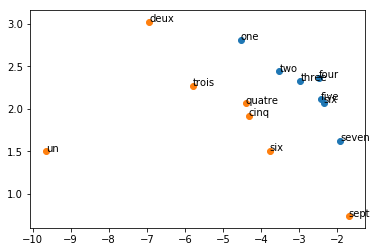

In [25]:
#ENGLISH
# create a scatter plot of the projection
index_en=[list(model_en.wv.vocab).index("one"),list(model_en.wv.vocab).index("two"),list(model_en.wv.vocab).index("three"),list(model_en.wv.vocab).index("four"),list(model_en.wv.vocab).index("five"),list(model_en.wv.vocab).index("six"),list(model_en.wv.vocab).index("seven")]
result_en=np.array([transform(result_en_pca[i]) for i in index_en])
plt.scatter(result_en[:, 0], result_en[:, 1])
en_words = [ list(model_en.wv.vocab)[i] for i in index_en]
for i, word in enumerate(en_words):
    print(word)
    plt.annotate(word, xy=(result_en[i, 0], result_en[i, 1]))
# plt.show()

index_fr=[list(model_fr.wv.vocab).index("un"),list(model_fr.wv.vocab).index("deux"),list(model_fr.wv.vocab).index("trois"),list(model_fr.wv.vocab).index("quatre"),list(model_fr.wv.vocab).index("cinq"),list(model_fr.wv.vocab).index("six"),list(model_fr.wv.vocab).index("sept")]
result_fr=np.array([result_fr_pca[i] for i in index_fr])
plt.scatter(result_fr[:, 0],result_fr[:, 1])
fr_words = [ list(model_fr.wv.vocab)[i] for i in index_fr]
for i, word in enumerate(fr_words):
    print(word)
    plt.annotate(word, xy=(result_fr[i, 0], result_fr[i, 1]))
plt.show()

In [26]:
word_arr = np.array(list(model_fr.wv.vocab))
en_list = list(model_en.wv.vocab)
def predict_2d(word_en,topWords):
    en_emb = result_en_pca[en_list.index(word_en)]
    translator = Translator()
    french_word = translator.translate(word_en,src="en",dest="fr").text
    return list(word_arr[np.argsort(np.sum((result_fr_pca - transform(en_emb)) ** 2,axis=1))[:topWords]]), french_word

In [27]:
predict_2d('porch',5)

(['veau', 'chevelu', 'dragons', 'descendus', 'designs'], 'porche')

# Dynet Method of solving N-DIMM transformation matrix

In [28]:
DIMM = X_en.shape[1]

In [77]:
import _dynet as dy
dyparams = dy.DynetParams()
dyparams.set_mem(2048)
dyparams.set_autobatch(True)
dyparams.init()

# create a parameter collection and add the parameters.
m = dy.ParameterCollection()
pW = m.add_parameters((DIMM,DIMM))
pb = m.add_parameters((DIMM))

dy.renew_cg() # new computation graph. not strictly needed here, but good practice.

# associate the parameters with cg Expressions
W = dy.parameter(pW)
b = dy.parameter(pb)

In [78]:
x = dy.vecInput(DIMM) # an input vector of size 2. Also an expression.
y = dy.vecInput(DIMM)
output = W*x

In [31]:
# SIZE = len(word_pairs)

# trainer = dy.SimpleSGDTrainer(m)

# en_list = list(model_en.wv.vocab)
# fr_list = list(model_fr.wv.vocab)


# EPOCHS = 5

# for epoch in range(EPOCHS):
#     inds = np.random.choice(len(word_pairs),size=SIZE,replace=False)
#     total_loss = 0
#     seen_instances = 0
#     for i in range(len(inds)):
#         word_pair = word_pairs[inds[i]]
#         word_en = word_pair[0]
#         word_fr = word_pair[1]
#         en_emb = X_en[en_list.index(word_en)]
#         fr_emb = X_fr[fr_list.index(word_fr)]

#         x.set(en_emb)
#         y.set(fr_emb)

#         loss = dy.squared_distance(output,y)
#         seen_instances += 1
#         total_loss += loss.value()
#         loss.backward()
#         trainer.update()
#         if (seen_instances > 1 and seen_instances % 1000 == 0):
#             print ("average loss is:",total_loss / seen_instances)
#             seen_instances = 0
#             total_loss = 0

# mat = W.value()

# with open('mat.pkl', 'wb') as f:
#     pickle.dump(mat, f)
    
mat = pickle.load(open("mat.pkl", "rb"))

In [82]:
SIZE = 500

trainer = dy.SimpleSGDTrainer(m)

en_list = list(model_en.wv.vocab)
fr_list = list(model_fr.wv.vocab)


EPOCHS = 1

for epoch in range(EPOCHS):
    words = np.random.choice(list(common_vocab),size=SIZE,replace=False)
    total_loss = 0
    seen_instances = 0
    for i,word in enumerate(words):
        word_en = word
        translator = Translator()
        word_fr = translator.translate(word_en,src="en",dest="fr").text
        if word_fr not in french_vocab:
            continue
        en_emb = X_en[en_list.index(word_en)]
        fr_emb = X_fr[fr_list.index(word_fr)]
        
        en_emb /= np.linalg.norm(en_emb)
        fr_emb /= np.linalg.norm(fr_emb)

        x.set(en_emb)
        y.set(fr_emb)

        loss = dy.squared_distance(output,y)
        seen_instances += 1
        total_loss += loss.value()
        loss.backward()
        trainer.update()
        print(i)

mat = W.value()

# with open('mat.pkl', 'wb') as f:
#     pickle.dump(mat, f)
    
# mat = pickle.load(open("mat.pkl", "rb"))

0
1
2
3
4
5
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
28
30
31
32
34
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
55
56
57
58
59
61
62
64
65
67
70
71
72
73
74
75
76
77
78
79
81
83
84
85
86
87
88
89
90
91
92
94
95
96
99
100
101
102
103
105
106
107
108
110
111
113
114
115
116
117
119
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
140
141
142
143
144
145
146
147
148
149
150
151
153
154
156
157
158
159
161
162
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
181
183
184
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
204
205
207
208
209
211
213
214
216
217
219
220
221
222
223
224
225
226
228
229
231
232
233
234
235
237
238
240
241
242
243
244
245
246
247
248
249
250
252
253
255
256
257
258
259
260
262
263
264
265
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
290
291
292
293
294
295
296
298
299
300
301
302
303
304
306
307
308
309
311
312
313
315
316
317
318
319
320
321
323

# Better Prediction Method

In [63]:
word_arr = np.array(list(model_fr.wv.vocab))
X_fr_mag = np.sum(X_fr**2,axis=1)**0.5
def predict_cosineSim(word_en,topWords):
    en_emb = X_en[en_list.index(word_en)]
    out = np.dot(mat,en_emb.reshape((DIMM,1))).flatten()
#     translator = Translator()
#     french_word = translator.translate(word_en,src="en",dest="fr").text
    
    out_mag = np.sum(out**2)**0.5
    cos_sim = np.sum((X_fr * out),axis=1)/(X_fr_mag*out_mag)
    return list(word_arr[np.argsort(cos_sim)[::-1][:topWords]])#, french_word

In [61]:
predict_cosineSim('help',5)

['rechercher', 'motiver', 'retenir', 'employer', 'décourager']

In [49]:
mat

array([[-0.11642781, -0.10138633,  0.10422647, ..., -0.08579443,
        -0.0020427 ,  0.06484585],
       [-0.03236171, -0.17202863,  0.06805858, ...,  0.15604503,
         0.01090534,  0.10312878],
       [ 0.00867508, -0.00858643,  0.03499121, ..., -0.00704601,
         0.0798072 ,  0.0710605 ],
       ...,
       [-0.08943613,  0.11992085,  0.06567602, ...,  0.04283473,
        -0.02468749, -0.02396454],
       [ 0.00453394,  0.01394705,  0.0574959 , ..., -0.04394156,
         0.02459029,  0.03320491],
       [ 0.0352251 , -0.00351767, -0.04700478, ...,  0.13312408,
        -0.04900169,  0.02070702]])

# Worse Prediction Method

In [ ]:
word_arr = np.array(list(model_fr.wv.vocab))
def predict_closest(word_en,topWords):
    en_emb = X_en[en_list.index(word_en)]
    out = np.dot(mat,en_emb.reshape((DIMM,1))).flatten()
#     translator = Translator()
#     french_word = translator.translate(word_en,src="en",dest="fr").text
    
    return list(word_arr[np.argsort(np.sum((X_fr - out) ** 2,axis=1))[:topWords]])#, french_word

In [ ]:
predict_closest('chocolate',5)

# Accuracy of Model

In [83]:
test_sample = np.random.choice(list(train_vocab),size=100,replace=False)

num_correct = 0
num_incorrect = 0
for i, word in enumerate(test_sample):
    translator = Translator()
    french_word = translator.translate(word,src="en",dest="fr").text
    if french_word not in french_vocab or word == french_word or word[0].isupper():
        continue
    output_list = predict_cosineSim(word,20)
    output_set = set(output_list)
    if french_word in output_set:
        num_correct += 1
        print('CORRECT:  ' + word)
    else:
        flag = False
        for word_fr in output_list:
            if translator.translate(word_fr,src="fr",dest="en").text == word:
                num_correct += 1
                print('CORRECT:  ' + word)
                flag = True
                break
        if not flag:
            num_incorrect += 1
            print('INCORRECT:  ' + word)

acc = num_correct / (num_correct + num_incorrect)
print(acc)

CORRECT:  least
INCORRECT:  bench
INCORRECT:  expectancy
CORRECT:  people
INCORRECT:  hostages
INCORRECT:  lobby
INCORRECT:  adviser
CORRECT:  sale
CORRECT:  estimate
CORRECT:  prospect
INCORRECT:  expanded
INCORRECT:  withdrawn
INCORRECT:  degree
INCORRECT:  livestock
INCORRECT:  middle
CORRECT:  continues
INCORRECT:  sought
INCORRECT:  acclaimed
INCORRECT:  petrol
INCORRECT:  15th
INCORRECT:  donors
CORRECT:  fundamentally
INCORRECT:  privilege
CORRECT:  computer
INCORRECT:  laptop
INCORRECT:  log
INCORRECT:  dragged
INCORRECT:  swing
CORRECT:  wants
INCORRECT:  branch
INCORRECT:  rings
CORRECT:  choosing
INCORRECT:  genius
INCORRECT:  galleries
CORRECT:  margin
INCORRECT:  attackers
INCORRECT:  stem
CORRECT:  listing
CORRECT:  unemployment
INCORRECT:  flow
INCORRECT:  path
CORRECT:  columns
INCORRECT:  engineer
CORRECT:  billion
INCORRECT:  written
INCORRECT:  panel
INCORRECT:  practically
INCORRECT:  assassination
CORRECT:  games
CORRECT:  signing
INCORRECT:  employ
INCORRECT:  del

In [ ]:
#0.42857142857142855
#0.34375
#0.4807692307692308